In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget
import numpy as np

In [2]:
pwd

'/Users/mike/src/xsens_parser/iSole'

# Right

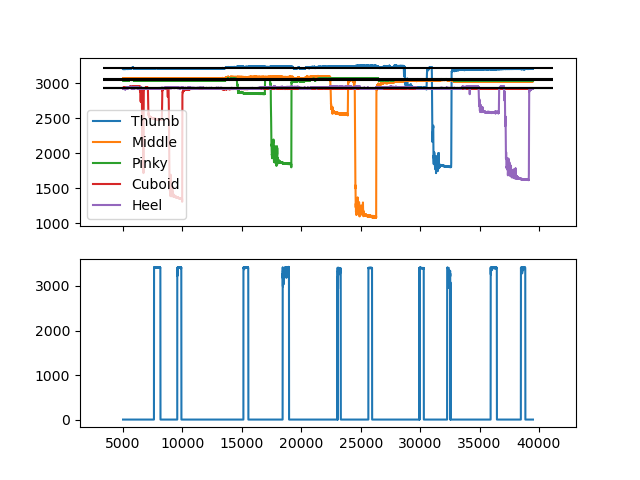

In [79]:
df1 = pd.read_csv("2022-12-05 Calibration/2022-12-05_19-43-41_uart1.sole", 
                  sep = ' ', header=None)[[0,1,2,3,4,5,9,10]]\
        .rename(columns=dict(zip([0,1,2,3,4,5,9,10], ['Thumb', 'Middle', 'Pinky', 'Cuboid', 'Heel', 'Button', 'Flexion', 'Side'])))\
        .iloc[5000:]

side = df1.Side.iloc[0]

fig, axx = plt.subplots(2,1,sharex=True)

plt.sca(axx[0])
plt.plot(df1[['Thumb', 'Middle', 'Pinky', 'Cuboid', 'Heel']])
plt.hlines(df1[['Thumb', 'Middle', 'Pinky', 'Cuboid', 'Heel']].median(), *(plt.xlim()), color='k')
plt.legend(['Thumb', 'Middle', 'Pinky', 'Cuboid', 'Heel'])

plt.sca(axx[1])
plt.plot(df1.Button)

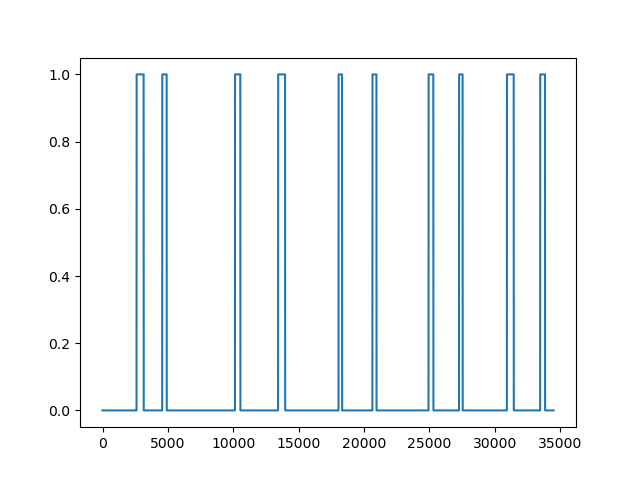

In [11]:
from scipy.ndimage import binary_closing

mask = binary_closing(df1.Button > 100, np.ones(100))

plt.figure()
plt.plot(mask)

In [58]:
from regionprops1d import regionprops1d

df_rps = regionprops1d(mask, *((df1[['Thumb', 'Middle', 'Pinky', 'Cuboid', 'Heel']]/df1[['Thumb', 'Middle', 'Pinky', 'Cuboid', 'Heel']].median()).values.T))
df_rps

,Onset,Offset,Length,Mean,Median,STD,Min,Max,Mean_1,Median_1,...,Mean_3,Median_3,STD_3,Min_3,Max_3,Mean_4,Median_4,STD_4,Min_4,Max_4
0,2601,3142,541,0.998512,0.998443,0.000267,0.997821,0.999377,1.001792,1.002620,...,0.850227,0.850154,0.001217,0.848101,0.853233,0.998111,0.997952,0.000941,0.995562,1.000341
1,4563,4904,341,0.998691,0.998755,0.000285,0.998132,0.999377,1.002234,1.002947,...,0.465066,0.464933,0.001587,0.462196,0.468697,1.000279,1.000341,0.000622,0.998634,1.001707
2,10128,10539,411,1.005689,1.005604,0.000165,1.005293,1.006227,1.008789,1.009823,...,0.997518,0.997605,0.000328,0.996579,0.998289,0.997487,0.997610,0.000934,0.995220,1.000341
3,13428,13963,535,1.007191,1.007161,0.000282,1.006538,1.007783,1.009182,1.010151,...,0.998257,0.998289,0.000296,0.996921,0.998974,1.003384,1.003756,0.001515,0.999317,1.005804
4,18051,18321,270,1.007691,1.007783,0.000340,1.006849,1.008717,0.840111,0.840537,...,0.998974,0.998974,0.000333,0.997947,1.000000,1.003732,1.003756,0.001409,1.000341,1.007170
5,20643,20953,310,1.010008,1.009963,0.000308,1.009340,1.010585,0.360902,0.361493,...,0.999158,0.998974,0.000355,0.997947,0.999658,0.998748,0.998976,0.000752,0.996244,1.001024
6,24936,25304,368,0.912793,0.912827,0.000460,0.911582,0.914695,0.995978,0.996726,...,0.999483,0.999658,0.000282,0.998632,1.000342,0.998473,0.998634,0.000720,0.996586,1.000341
7,27269,27544,275,0.562248,0.562267,0.000654,0.561021,0.564134,0.998141,0.999018,...,0.999817,0.999658,0.000326,0.999316,1.001026,0.999419,0.999317,0.000787,0.997610,1.001366
8,30931,31453,522,0.995336,0.995330,0.000311,0.994396,0.995953,0.991627,0.992469,...,1.000366,1.000342,0.000375,0.999316,1.001026,0.880295,0.880164,0.001595,0.876750,0.885968
9,33475,33847,372,0.995867,0.995641,0.000274,0.995330,0.996264,0.992189,0.993124,...,1.000426,1.000342,0.000433,0.998632,1.001368,0.555822,0.555821,0.001050,0.553431,0.558552


In [59]:
df_segments = df_rps[['Mean', 'Mean_1', 'Mean_2', 'Mean_3', 'Mean_4']].rename(columns=dict(zip(['Mean', 'Mean_1', 'Mean_2', 'Mean_3', 'Mean_4'], 
                                                                                 ['Thumb', 'Middle', 'Pinky', 'Cuboid', 'Heel'])))
df_segments

,Thumb,Middle,Pinky,Cuboid,Heel
0,0.998512,1.001792,0.999095,0.850227,0.998111
1,0.998691,1.002234,0.998994,0.465066,1.000279
2,1.005689,1.008789,0.938713,0.997518,0.997487
3,1.007191,1.009182,0.609670,0.998257,1.003384
4,1.007691,0.840111,1.006769,0.998974,1.003732
5,1.010008,0.360902,1.008435,0.999158,0.998748
6,0.912793,0.995978,1.003364,0.999483,0.998473
7,0.562248,0.998141,1.004309,0.999817,0.999419
8,0.995336,0.991627,0.999029,1.000366,0.880295
9,0.995867,0.992189,0.999121,1.000426,0.555822


In [60]:
df_segments.idxmin(axis=1).values.reshape(-1,2).T

array([['Cuboid', 'Pinky', 'Middle', 'Thumb', 'Heel'],
       ['Cuboid', 'Pinky', 'Middle', 'Thumb', 'Heel']], dtype=object)

In [61]:
df1[['Thumb', 'Middle', 'Pinky', 'Cuboid', 'Heel']].median()

Thumb     3212.0
Middle    3054.0
Pinky     3040.0
Cuboid    2923.0
Heel      2929.0
dtype: float64

In [78]:
df_calibration = pd.DataFrame(df_rps[['Mean', 'Mean_1', 'Mean_2', 'Mean_3', 'Mean_4']].min(axis=1)\
                              .values.reshape(-1,2).T, 
                              columns=df_segments.idxmin(axis=1).values.reshape(-1,2).T[0],
                              index=[5, 15])
df_calibration *= df1[['Thumb', 'Middle', 'Pinky', 'Cuboid', 'Heel']].median()
df_calibration.loc[0] = df1[['Thumb', 'Middle', 'Pinky', 'Cuboid', 'Heel']].median()
df_calibration.sort_index(inplace=True)
df_calibration['Side'] = df1.Side.iloc[0]
df_calibration

,Cuboid,Pinky,Middle,Thumb,Heel,Side
0,2923.000000,3040.000000,3054.000000,3212.000000,2929.000000,R
5,2485.212569,2853.686131,2565.700000,2931.891304,2578.383142,R
15,1359.387097,1853.398131,1102.193548,1805.941818,1628.002688,R


In [81]:
df_calibration.to_csv(f'2022-12-05 Calibration_{side}.csv')

# Left

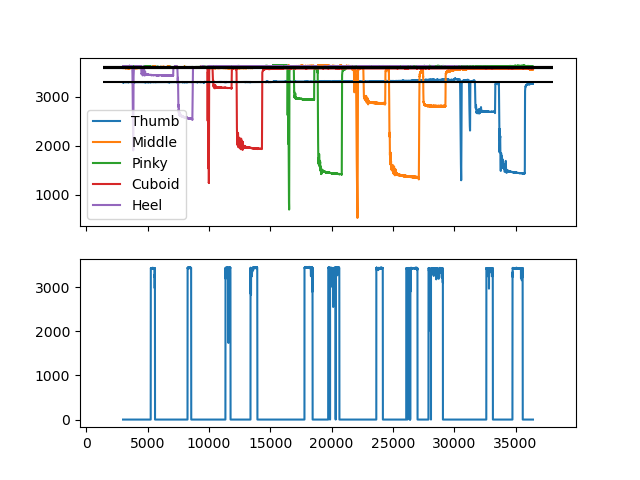

In [3]:
df1 = pd.read_csv("2022-12-05 Calibration/2022-12-05_21-15-28_uart1.sole", 
                  sep = ' ', header=None)[[0,1,2,3,4,5,9,10]]\
        .rename(columns=dict(zip([0,1,2,3,4,5,9,10], ['Thumb', 'Middle', 'Pinky', 'Cuboid', 'Heel', 'Button', 'Flexion', 'Side'])))\
        .iloc[3000:]

side = df1.Side.iloc[0]

fig, axx = plt.subplots(2,1,sharex=True)

plt.sca(axx[0])
plt.plot(df1[['Thumb', 'Middle', 'Pinky', 'Cuboid', 'Heel']])
plt.hlines(df1[['Thumb', 'Middle', 'Pinky', 'Cuboid', 'Heel']].median(), *(plt.xlim()), color='k')
plt.legend(['Thumb', 'Middle', 'Pinky', 'Cuboid', 'Heel'])

plt.sca(axx[1])
plt.plot(df1.Button)

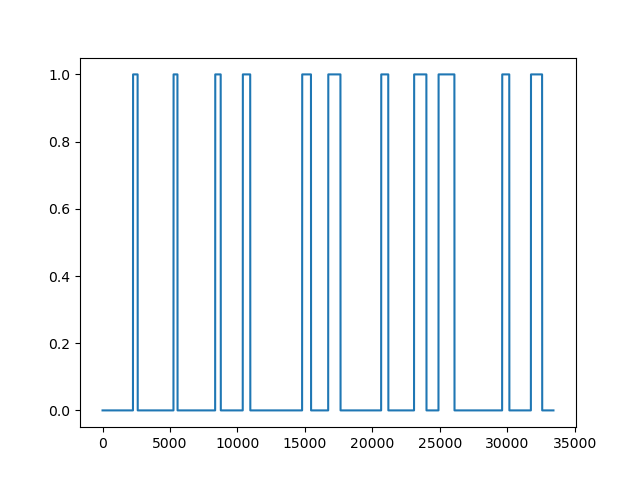

In [4]:
from scipy.ndimage import binary_closing

mask = binary_closing(df1.Button > 100, np.ones(100))

plt.figure()
plt.plot(mask)

In [6]:
from regionprops1d import regionprops1d

df_rps = regionprops1d(mask, *((df1[['Thumb', 'Middle', 'Pinky', 'Cuboid', 'Heel']]/df1[['Thumb', 'Middle', 'Pinky', 'Cuboid', 'Heel']].median()).values.T))
df_rps

,Onset,Offset,Length,Mean,Median,STD,Min,Max,Mean_1,Median_1,...,Mean_3,Median_3,STD_3,Min_3,Max_3,Mean_4,Median_4,STD_4,Min_4,Max_4
0,2255,2599,344,0.998903,0.998787,0.000279,0.998181,1.000000,1.003843,1.004458,...,1.005202,1.005318,0.000267,1.004478,1.005877,0.952929,0.952896,0.000330,0.951787,0.953727
1,5256,5551,295,0.999069,0.999090,0.000306,0.998484,0.999394,1.001620,1.001950,...,1.006253,1.006437,0.000235,1.005598,1.006997,0.708636,0.708507,0.001136,0.706290,0.711000
2,8345,8756,411,0.999616,0.999394,0.000331,0.998787,1.000606,0.999557,1.000000,...,0.888740,0.888609,0.000380,0.888049,0.890008,1.000597,1.000831,0.000324,0.999446,1.001108
3,10390,10943,553,0.999520,0.999394,0.000319,0.998787,1.000000,1.001606,1.001115,...,0.545004,0.544920,0.001253,0.541282,0.547719,1.001006,1.001108,0.000286,1.000000,1.001940
4,14789,15446,657,1.002926,1.003032,0.000291,1.002122,1.003942,1.009235,1.009473,...,0.999652,0.999720,0.000180,0.998880,1.000280,1.000269,1.000277,0.000391,0.999169,1.000831
5,16722,17630,908,1.005197,1.005458,0.000350,1.004245,1.006064,1.009032,1.009195,...,0.999784,0.999720,0.000207,0.998880,1.000280,1.000168,1.000277,0.000339,0.999169,1.000831
6,20646,21173,527,1.004534,1.004851,0.000363,1.003639,1.005458,0.798697,0.799108,...,1.000036,1.000000,0.000237,0.999440,1.000280,0.999763,0.999723,0.000348,0.998337,1.000831
7,23084,23999,915,1.008030,1.007277,0.001511,1.005761,1.010916,0.381561,0.381443,...,0.999965,1.000000,0.000248,0.998880,1.000560,0.999588,0.999723,0.000284,0.998337,1.000277
8,24895,26075,1180,1.012975,1.012735,0.000521,1.011219,1.014554,0.782402,0.782669,...,0.999983,1.000000,0.000243,0.999440,1.000560,0.999744,0.999723,0.000302,0.998892,1.000831
9,29612,30141,529,0.816498,0.816252,0.000864,0.814736,0.819284,0.996743,0.996935,...,0.999915,1.000000,0.000232,0.999160,1.000280,0.998126,0.998615,0.000599,0.996675,0.998892


In [9]:
df_segments = df_rps[['Mean', 'Mean_1', 'Mean_2', 'Mean_3', 'Mean_4']].rename(columns=dict(zip(['Mean', 'Mean_1', 'Mean_2', 'Mean_3', 'Mean_4'], 
                                                                                 ['Thumb', 'Middle', 'Pinky', 'Cuboid', 'Heel'])))
df_segments.drop(index=[8], inplace=True)
df_segments

,Thumb,Middle,Pinky,Cuboid,Heel
0,0.998903,1.003843,0.997230,1.005202,0.952929
1,0.999069,1.001620,0.996495,1.006253,0.708636
2,0.999616,0.999557,1.000578,0.888740,1.000597
3,0.999520,1.001606,1.001230,0.545004,1.001006
4,1.002926,1.009235,0.813852,0.999652,1.000269
5,1.005197,1.009032,0.397375,0.999784,1.000168
6,1.004534,0.798697,1.001886,1.000036,0.999763
7,1.008030,0.381561,1.001838,0.999965,0.999588
9,0.816498,0.996743,0.999912,0.999915,0.998126
10,0.439057,0.997178,1.003381,1.000057,0.996700


In [10]:
df_segments.idxmin(axis=1).values.reshape(-1,2).T

array([['Heel', 'Cuboid', 'Pinky', 'Middle', 'Thumb'],
       ['Heel', 'Cuboid', 'Pinky', 'Middle', 'Thumb']], dtype=object)

In [11]:
df1[['Thumb', 'Middle', 'Pinky', 'Cuboid', 'Heel']].median()

Thumb     3298.0
Middle    3589.0
Pinky     3612.0
Cuboid    3573.0
Heel      3609.0
dtype: float64

In [14]:
df_calibration = pd.DataFrame(df_segments.min(axis=1)\
                              .values.reshape(-1,2).T, 
                              columns=df_segments.idxmin(axis=1).values.reshape(-1,2).T[0],
                              index=[5, 15])
df_calibration *= df1[['Thumb', 'Middle', 'Pinky', 'Cuboid', 'Heel']].median()
df_calibration.loc[0] = df1[['Thumb', 'Middle', 'Pinky', 'Cuboid', 'Heel']].median()
df_calibration.sort_index(inplace=True)
df_calibration['Side'] = df1.Side.iloc[0]
df_calibration

,Heel,Cuboid,Pinky,Middle,Thumb,Side
0,3609.000000,3573.000000,3612.000000,3589.000000,3298.000000,L
5,3439.122093,3175.467153,2939.634703,2866.521822,2692.810964,L
15,2557.467797,1947.298373,1435.317181,1369.421858,1448.009627,L


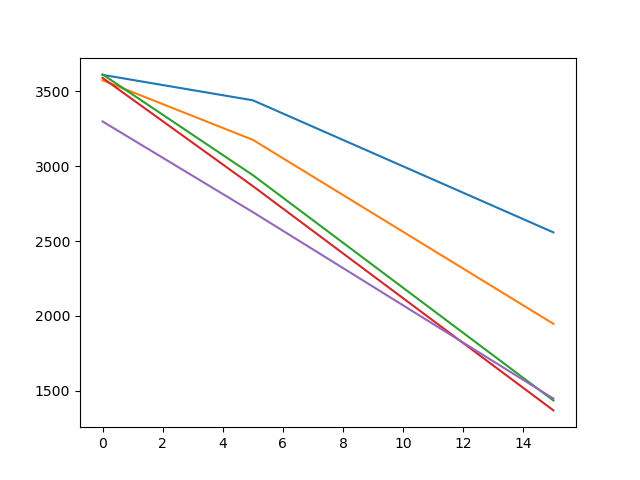

In [16]:
plt.figure()
plt.plot(df_calibration.iloc[:, :5])